# two twitter comments I promised to reply to ... then forgot

https://twitter.com/MariosRichards/status/1380084675171991554
https://twitter.com/MariosRichards/status/1379924403912372229

In [1]:
# %%time
# dataset_name = "W19_comb"
# df_list = [ "BES_Panel" ]

# %matplotlib inline 
# %run BES_header.py {dataset_name} {df_list}

# if "id" in BES_Panel.columns:
#     BES_Panel = BES_Panel.set_index("id").sort_index()

# (var_type, cat_dictionary, new_old_col_names, old_new_col_names) = get_small_files(data_subfolder, encoding)    
    
# # get full set of inferred "cross wave" auth-lib/left-right values and ages
# pan_dataset_allr_values = pd.read_csv(BES_small_data_files + "pan_dataset_allr_valuesW19"+".csv")
# pan_dataset_ages = pd.read_pickle(BES_small_data_files + "pan_dataset_ages"+".zip", compression='zip')



Toggle code

FileNotFoundError: [Errno 2] No such file or directory: "../BES_analysis_data/W19_comb\\['BES_Panel'].zip"

NameError: name 'BES_Panel' is not defined

In [1]:
%%time
dataset_name = "W19_comb"
df_list = "BES_Panel"

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}
(var_type, cat_dictionary, new_old_col_names, old_new_col_names) = get_small_files(data_subfolder, encoding)    
# get full set of inferred "cross wave" auth-lib/left-right values and ages
pan_dataset_allr_values = pd.read_pickle(BES_small_data_files + "pan_dataset_allr_valuesW19"+".zip",compression='zip')
# pan_dataset_allr_values = pan_dataset_allr_values.loc[BES_Panel.index].sort_index()
pan_dataset_ages = pd.read_pickle(BES_small_data_files + "pan_dataset_ages"+".zip", compression='zip')
pan_dataset_votes = pd.read_pickle(BES_small_data_files+"pan_dataset_votes"+".zip",compression='zip')


Toggle code

var_type (8079, 14)
Wall time: 17.1 s


In [2]:
# BES_Panel = pd.read_pickle("..\\BES_analysis_data\\"+"W19_comb"+os.sep+"BES_Panelv02",compression='zip')
# BES_Panel = BES_Panel.set_index("id")
# BES_Panel = BES_Panel.sort_index()

# pan_dataset_allr_values = pan_dataset_allr_values.set_index("id").loc[BES_Panel.index]

In [3]:
wave_to_name = BES_file_manifest[BES_file_manifest["Only_or_Combined"]=="Only"].set_index("Wave No")["Friendlier_Description"]

In [4]:
def weighted_mean(x):
#     if x.empty:
#         return np.nan    
    val, weight = map(np.asarray, zip(*x))
    val, weight = val[~np.isnan(val)],weight[~np.isnan(val)]
    return (val * weight).sum() / weight.sum()

import numba

def weighted_mean_bstrap(x,size):
    if x.empty:
        return np.nan
    val, weight = map(np.asarray, zip(*x))
    return wt_mean(val,weight,size)

@numba.jit
def wt_mean(val, weight,size):
    val, weight = val[~np.isnan(val)],weight[~np.isnan(val)]

    bs_reps = np.empty(size)

    # Draw replicates
    n = len(val)
    for i in range(size):
        ind = np.random.choice(range(0,n), size=n)
        bs_reps[i] = (val[ind] * weight[ind]).sum() / weight[ind].sum()
        
    return bs_reps

def wt_err(x,size,conf_int = [2.5,97.5]):
    lower,upper = np.percentile( weighted_mean_bstrap(x,size) , conf_int)
    return (lower,upper)

In [5]:
import numpy as np
import holoviews as hv
hv.extension('matplotlib')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [6]:
lr_col = pan_dataset_allr_values.columns[2]
al_col = pan_dataset_allr_values.columns[3]

from holoviews import dim
from scipy import stats

In [7]:
import textwrap

def hol_plot_var_by_lr_by_al(x_var_name,xlabel,y_var_name,ylabel,wt_var, al_var_name="al",
                             zlabel=None,q=5,x_cat_list=None,non_ord_indices=[],reg_plot=True,
                             title=None,x_cat_text_width=13):
    if title is None:
        title = '{label} {group}\n{dimensions}'
    else:
        title = title+"\n"+'{label} {group}\n{dimensions}'
    
    if zlabel is None:
        zlabel = "Social Liberal (0) - Authoritarian ("+str(q-1)+")"

    df = BES_Panel[[x_var_name,wt_var]]
    if x_cat_list is None:
        x_cat_list = BES_Panel[x_var_name].cat.categories

        wrapper = textwrap.TextWrapper(width=x_cat_text_width) 
        x_cat_list = [wrapper.fill(text=x)  for x in x_cat_list]   
        
    if non_ord_indices==[] and "Don't know" in x_cat_list:
        non_ord_indices.append(  list( x_cat_list ).index("Don't know") )        
    
    hv_dict = {}

    mask = BES_Panel[wt_var].notnull() & BES_Panel[x_var_name].notnull() & pan_dataset_allr_values[[lr_col,al_col]].notnull().all(axis=1)
    lr = weighted_qcut(pan_dataset_allr_values[lr_col][mask],BES_Panel[wt_var][mask],q )
    al = weighted_qcut(pan_dataset_allr_values[al_col][mask],BES_Panel[wt_var][mask],q )

    df = df[mask]
    df[al_var_name] = al
    df[y_var_name] = lr

    df[y_var_name] = df[y_var_name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).astype('float32')
    max_y_value=df[y_var_name].max()
    df[al_var_name] = df[al_var_name].cat.codes.replace(-1,np.nan).astype('float32')
    df[y_var_name+"_wts"] = list(zip(df[y_var_name],df[wt_var]))


    for al_var in range(0,q):
        mask = df[al_var_name]==al_var
        means = df[mask].groupby(x_var_name)[y_var_name+"_wts"].agg(weighted_mean)
        wt_mean_errors = df[mask].groupby(x_var_name)[y_var_name+"_wts"].agg(wt_err, size=1000)
        lower = wt_mean_errors.apply(lambda x: x[0])
        upper = wt_mean_errors.apply(lambda x: x[1])
        count = df[mask].groupby(x_var_name)[y_var_name+"_wts"].count()

        chart_df = pd.DataFrame()
        chart_df["means"]=means
        chart_df["lower_error"]=lower
        chart_df["upper_error"]=upper
        chart_df["N"]=count
    #     chart_df

        chart_df = chart_df.reset_index()
        chart_df[x_var_name] = chart_df[x_var_name].cat.codes
        chart_df[["lower_error","upper_error"]] = chart_df[["lower_error","upper_error"]].apply(lambda x: x-chart_df["means"])
        chart_df["lower_error"] = chart_df["lower_error"].abs()

        chart = hv.Curve(chart_df) * hv.ErrorBars(chart_df, vdims=['means', 'lower_error', 'upper_error'])


        non_ord_mask = chart_df[x_var_name].apply(lambda x: x not in non_ord_indices)
        xs = chart_df[x_var_name][non_ord_mask]
        ys = chart_df["means"][non_ord_mask]

        slope, intercep, rval, pval, std = stats.linregress(xs, ys)
        # rho, pval = stats.spearmanr(xs,ys)
    #     xs = np.linspace(0,14,2)
        if reg_plot:
            reg = slope*xs+intercep
            chart = chart * hv.Curve((xs, reg)).relabel('r2: %.3f' % (slope) )    
        chart.opts(ylim=(0,max_y_value),xlim=(-.1,len(x_cat_list)-.9),
                  xticks= [(x,x_cat_list[x]) for x in range(0,len(x_cat_list))],
                  fig_size=300,aspect=2,    
                  xlabel =xlabel, ylabel=ylabel,
                  title = title)
    #xrotation=45,
        hv_dict[al_var] = chart
    return hv_dict,zlabel

In [8]:
import textwrap

def hol_plot_var1_by_var2_by_al(x_var_name,xlabel,y_var_name,ylabel,wt_var, al_var_name="al",
                             zlabel=None,q=5,x_cat_list=None,non_ord_indices=[],reg_plot=True,
                             title=None,x_cat_text_width=13):
    
    if title is None:
        title = '{label} {group}\n{dimensions}'
    else:
        title = title+"\n"+'{label} {group}\n{dimensions}'
    
    if zlabel is None:
        zlabel = "Social Liberal (0) - Authoritarian ("+str(q-1)+")"

    df = BES_Panel[[x_var_name,wt_var]]
    if x_cat_list is None:
        x_cat_list = BES_Panel[x_var_name].cat.categories

        wrapper = textwrap.TextWrapper(width=x_cat_text_width) 
        x_cat_list = [wrapper.fill(text=x)  for x in x_cat_list]          
    
    if non_ord_indices==[] and "Don't know" in x_cat_list:
        non_ord_indices.append( list( x_cat_list ).index("Don't know") )
    
    hv_dict = {}

    mask =  BES_Panel[wt_var].notnull() &\
            BES_Panel[x_var_name].notnull() &\
            pan_dataset_allr_values[al_col].notnull()&\
            BES_Panel[y_var_name].replace("Don't know",np.nan).notnull()

    # lr = weighted_qcut(pan_dataset_allr_values[lr_col][mask],BES_Panel[wt_var][mask],q )
    al = weighted_qcut(pan_dataset_allr_values[al_col][mask],BES_Panel[wt_var][mask],q )

    df = BES_Panel[[x_var_name,wt_var]][mask]
    df[al_var_name] = al
    df[y_var_name] = BES_Panel[y_var_name]

    df[y_var_name] = df[y_var_name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).astype('float32')
    max_y_value=df[y_var_name].max()
    df[al_var_name] = df[al_var_name].cat.codes.replace(-1,np.nan).astype('float32')
    df[y_var_name+"_wts"] = list(zip(df[y_var_name],df[wt_var]))


    for al_var in range(0,q):
        mask = df[al_var_name]==al_var
        means = df[mask].groupby(x_var_name)[y_var_name+"_wts"].agg(weighted_mean)
        wt_mean_errors = df[mask].groupby(x_var_name)[y_var_name+"_wts"].agg(wt_err, size=1000)
        lower = wt_mean_errors.apply(lambda x: x[0])
        upper = wt_mean_errors.apply(lambda x: x[1])
        count = df[mask].groupby(x_var_name)[y_var_name+"_wts"].count()

        chart_df = pd.DataFrame()
        chart_df["means"]=means
        chart_df["lower_error"]=lower
        chart_df["upper_error"]=upper
        chart_df["N"]=count
    #     chart_df

        chart_df = chart_df.reset_index()
        chart_df[x_var_name] = chart_df[x_var_name].cat.codes
        chart_df[["lower_error","upper_error"]] = chart_df[["lower_error","upper_error"]].apply(lambda x: x-chart_df["means"])
        chart_df["lower_error"] = chart_df["lower_error"].abs()

        chart = hv.Curve(chart_df) * hv.ErrorBars(chart_df, vdims=['means', 'lower_error', 'upper_error'])


        non_ord_mask = chart_df[x_var_name].apply(lambda x: x not in non_ord_indices)
        xs = chart_df[x_var_name][non_ord_mask]
        ys = chart_df["means"][non_ord_mask]

        slope, intercep, rval, pval, std = stats.linregress(xs, ys)
        # rho, pval = stats.spearmanr(xs,ys)
    #     xs = np.linspace(0,14,2)
        if reg_plot:
            reg = slope*xs+intercep
            chart = chart * hv.Curve((xs, reg)).relabel('r2: %.3f' % (slope) )    
        chart.opts(ylim=(0,max_y_value+.1),xlim=(-.1,len(x_cat_list)-.9),
                  xticks= [(x,x_cat_list[x]) for x in range(0,len(x_cat_list))],
                  fig_size=300,aspect=2,    
                  xlabel =xlabel, ylabel=ylabel,
                  title = title)
    #xrotation=45,
        hv_dict[al_var] = chart
    return hv_dict,zlabel

:HoloMap   [Social Liberal (0) - Authoritarian (4)]
   :Overlay
      .Curve.I                        :Curve   [p_gross_householdW17]   (means,lower_error,upper_error,N)
      .ErrorBars.I                    :ErrorBars   [p_gross_householdW17]   (means,lower_error,upper_error)
      .Curve.R2_colon_0_full_stop_111 :Curve   [x]   (y)
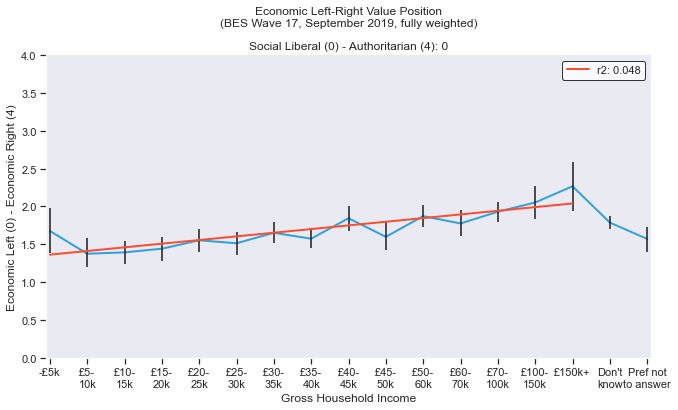
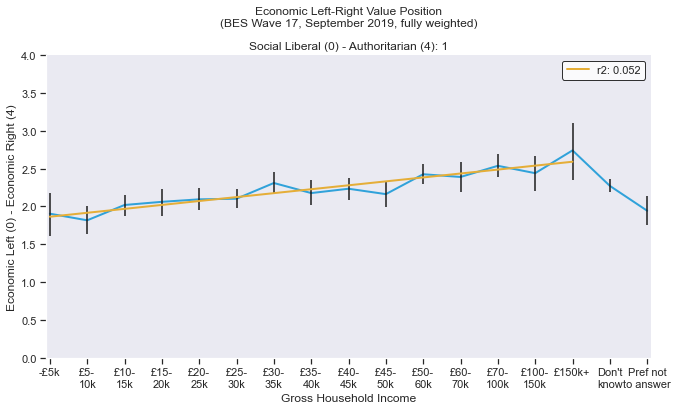
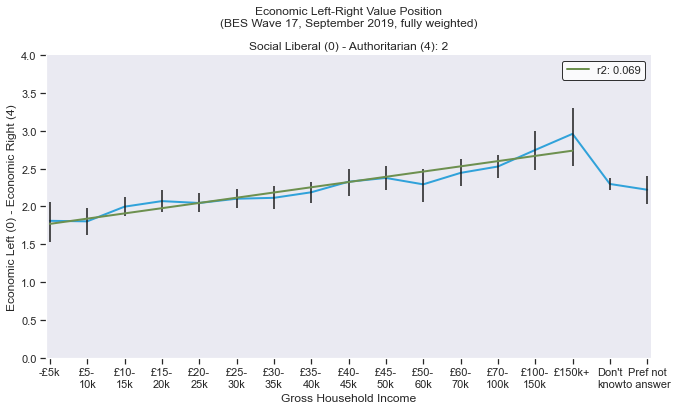
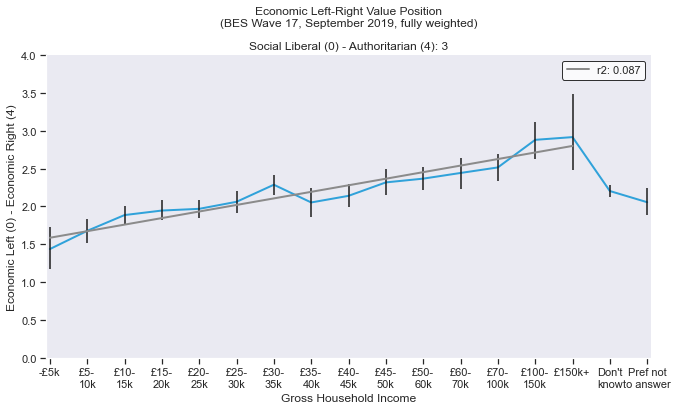
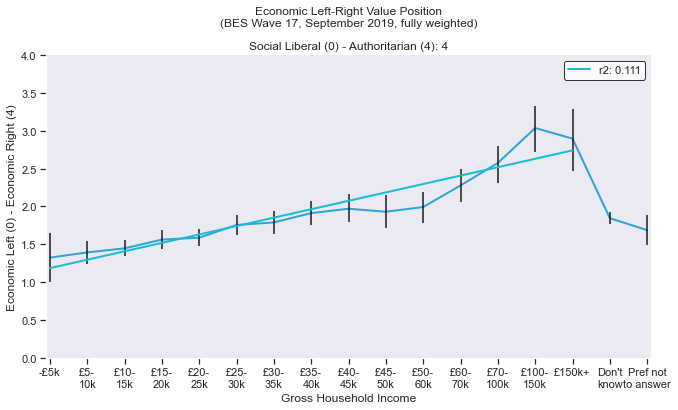

In [16]:
y_var_name = "lr"
granularity=5


title = "\n".join(["Economic Left-Right Value Position",
                   "(BES Wave 17, September 2019, fully weighted)"])
ylabel = "Economic Left (0) - Economic Right ("+str(granularity-1)+")"
wt_var = "wt_new_W17"

x_var_name = "p_gross_householdW17"
xlabel = "Gross Household Income"

x_cat_list = ["-£5k","£5-\n10k","£10-\n15k","£15-\n20k","£20-\n25k","£25-\n30k","£30-\n35k","£35-\n40k","£40-\n45k","£45-\n50k",
"£50-\n60k","£60-\n70k","£70-\n100k","£100-\n150k","£150k+","Don't\nknow","Pref not\nto answer"]
non_ord_indices = [15,16]

hv_dict,zlabel = hol_plot_var_by_lr_by_al(x_var_name,xlabel,y_var_name,ylabel,wt_var,
                                   q=granularity,x_cat_list=x_cat_list,non_ord_indices=non_ord_indices,title=title)

hv.output(backend='matplotlib',fig='png', holomap='widgets')    
hm = hv.HoloMap(hv_dict, kdims=[zlabel])
hm

In [ ]:
# split by Soc Lib-Authoritarianism
# x axis high granularity Economic Left-Right
# scored on components (lr1, lr2, lr3, lr4, lr5)






In [27]:
pd.qcut(pan_dataset_allr_values[lr_col],10).cat.codes.replace(-1,np.nan)

id
1        0.0
2        9.0
3        3.0
4        7.0
5        8.0
        ... 
98447    5.0
98448    7.0
98449    2.0
98450    4.0
98451    3.0
Length: 97006, dtype: float64

In [21]:

granularity=5

y_var_name = "lr1"
ylabel = "Redistribution to equalise incomes"

title = "\n".join(["Economic Left-Right Value Position",
                   "(BES Wave 17, September 2019, fully weighted)"])

wt_var = "wt_new_W17"

# x_var_name = "p_gross_householdW17"
# xlabel = "Gross Household Income"

x_var_name = "lr"
xlabel =  "Economic Left (0) - Economic Right ("+str(granularity-1)+")"

# x_cat_list = ["-£5k","£5-\n10k","£10-\n15k","£15-\n20k","£20-\n25k","£25-\n30k","£30-\n35k","£35-\n40k","£40-\n45k","£45-\n50k",
# "£50-\n60k","£60-\n70k","£70-\n100k","£100-\n150k","£150k+","Don't\nknow","Pref not\nto answer"]
# non_ord_indices = [15,16]
non_ord_indices = []
x_cat_list = [0,1,2,3,4]

hv_dict,zlabel = hol_plot_var_by_lr_by_al(x_var_name,xlabel,y_var_name,ylabel,wt_var,
                                   q=granularity,x_cat_list=x_cat_list,non_ord_indices=non_ord_indices,title=title)

hv.output(backend='matplotlib',fig='png', holomap='widgets')    
hm = hv.HoloMap(hv_dict, kdims=[zlabel])
hm

KeyError: "['lr'] not in index"

In [ ]:
BES_Panel["lr"] = pd.qcut(pan_dataset_allr_values[lr_col],5)

Wall time: 9.45 s


:HoloMap   [Social Liberal (0) - Authoritarian (4)]
   :Overlay
      .Curve.I                                     :Curve   [lr]   (means,lower_error,upper_error,N)
      .ErrorBars.I                                 :ErrorBars   [lr]   (means,lower_error,upper_error)
      .Curve.R2_colon_hyphen_minus_0_full_stop_540 :Curve   [x]   (y)
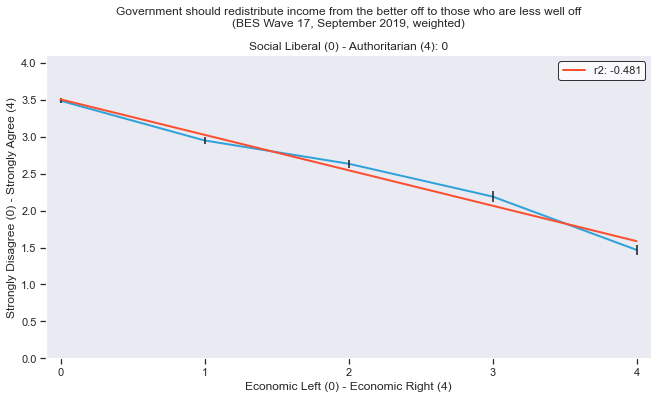
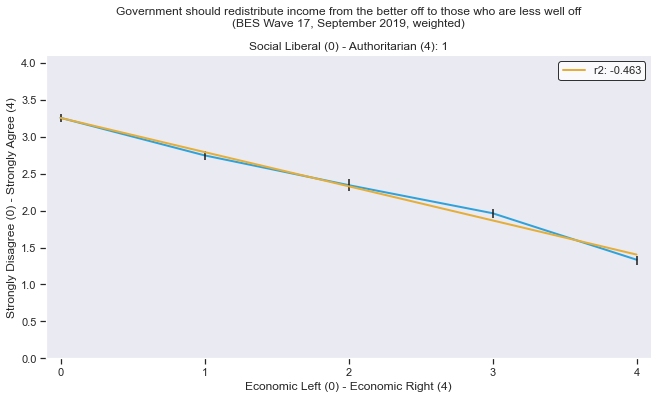
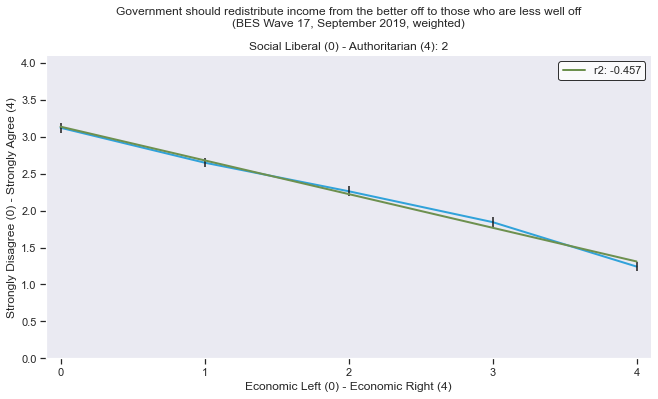
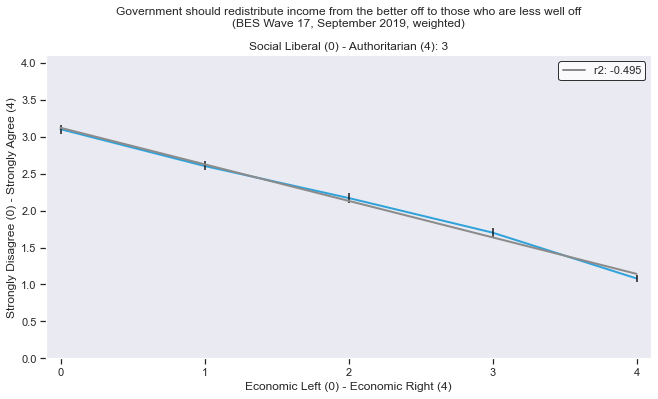
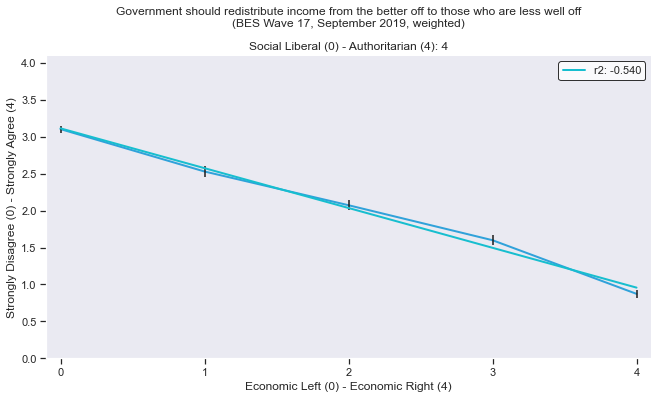

In [34]:
%%time
          
y_var_name = "lr1W17"
title = "\n".join(["Government should redistribute income from the better off to those who are less well off",
                   "(BES Wave 17, September 2019, weighted)"])
ylabel = "Strongly Disagree (0) - Strongly Agree (4)"

wt_var = "wt_new_W17"

# x_var_name = "p_gross_householdW17"
# xlabel = "Gross Household Income"

# x_cat_list = ["-£5k","£5-\n10k","£10-\n15k","£15-\n20k","£20-\n25k","£25-\n30k","£30-\n35k","£35-\n40k","£40-\n45k","£45-\n50k",
# "£50-\n60k","£60-\n70k","£70-\n100k","£100-\n150k","£150k+","Don't\nknow","Pref not\nto answer"]
# non_ord_indices = [15,16]

x_var_name = "lr"
xlabel =  "Economic Left (0) - Economic Right ("+str(granularity-1)+")"
non_ord_indices = []
x_cat_list = [0,1,2,3,4]

hv_dict,zlabel = hol_plot_var1_by_var2_by_al(x_var_name,xlabel,y_var_name,ylabel,wt_var,
                                   q=5,x_cat_list=x_cat_list,non_ord_indices=non_ord_indices,title=title)

hv.output(backend='matplotlib',fig='png', holomap='widgets')    
hm = hv.HoloMap(hv_dict, kdims=[zlabel])
hm

Wall time: 8.81 s


:HoloMap   [Social Liberal (0) - Authoritarian (4)]
   :Overlay
      .Curve.I                                     :Curve   [lr]   (means,lower_error,upper_error,N)
      .ErrorBars.I                                 :ErrorBars   [lr]   (means,lower_error,upper_error)
      .Curve.R2_colon_hyphen_minus_0_full_stop_324 :Curve   [x]   (y)
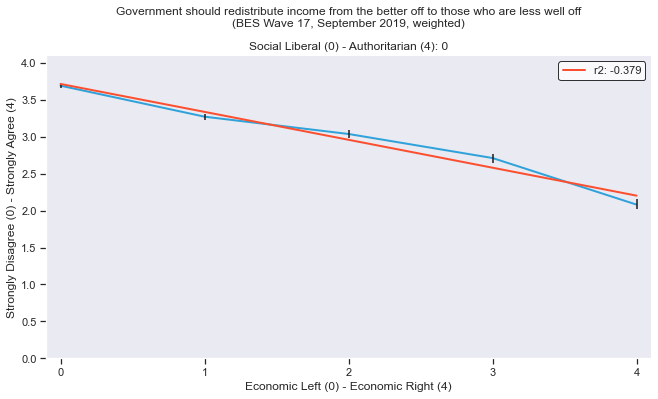
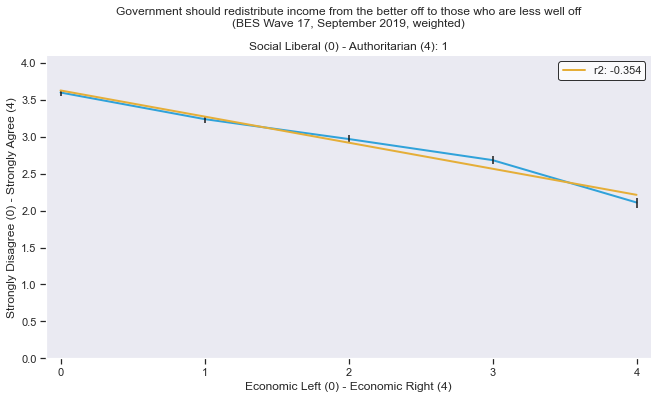
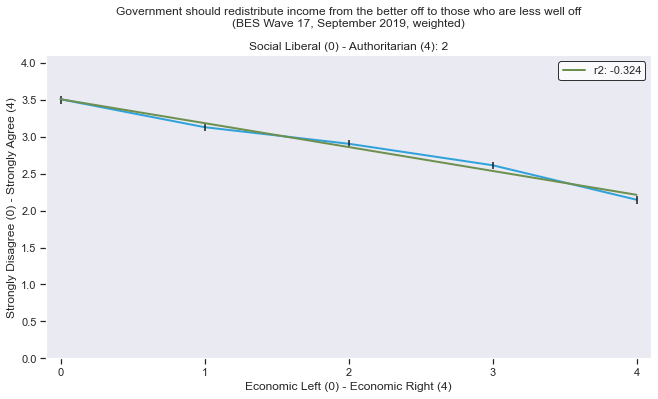
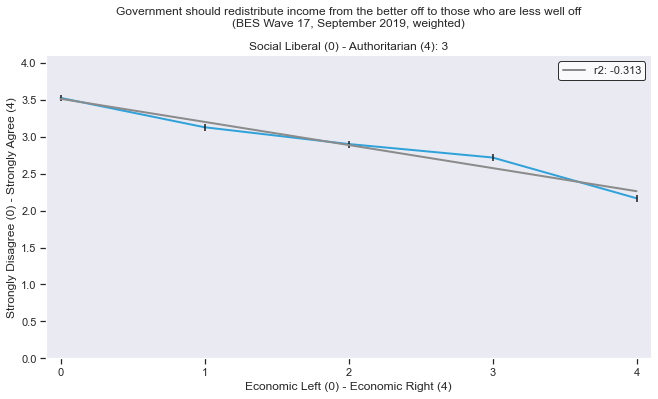
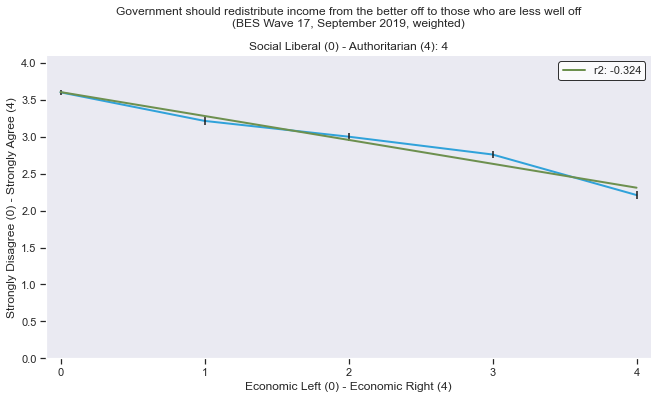

In [35]:
%%time
          
y_var_name = "lr2W17"
title = "\n".join(["Government should redistribute income from the better off to those who are less well off",
                   "(BES Wave 17, September 2019, weighted)"])
ylabel = "Strongly Disagree (0) - Strongly Agree (4)"

wt_var = "wt_new_W17"

# x_var_name = "p_gross_householdW17"
# xlabel = "Gross Household Income"

# x_cat_list = ["-£5k","£5-\n10k","£10-\n15k","£15-\n20k","£20-\n25k","£25-\n30k","£30-\n35k","£35-\n40k","£40-\n45k","£45-\n50k",
# "£50-\n60k","£60-\n70k","£70-\n100k","£100-\n150k","£150k+","Don't\nknow","Pref not\nto answer"]
# non_ord_indices = [15,16]

x_var_name = "lr"
xlabel =  "Economic Left (0) - Economic Right ("+str(granularity-1)+")"
non_ord_indices = []
x_cat_list = [0,1,2,3,4]

hv_dict,zlabel = hol_plot_var1_by_var2_by_al(x_var_name,xlabel,y_var_name,ylabel,wt_var,
                                   q=5,x_cat_list=x_cat_list,non_ord_indices=non_ord_indices,title=title)

hv.output(backend='matplotlib',fig='png', holomap='widgets')    
hm = hv.HoloMap(hv_dict, kdims=[zlabel])
hm

Wall time: 8.61 s


:HoloMap   [Social Liberal (0) - Authoritarian (4)]
   :Overlay
      .Curve.I                                     :Curve   [lr]   (means,lower_error,upper_error,N)
      .ErrorBars.I                                 :ErrorBars   [lr]   (means,lower_error,upper_error)
      .Curve.R2_colon_hyphen_minus_0_full_stop_293 :Curve   [x]   (y)
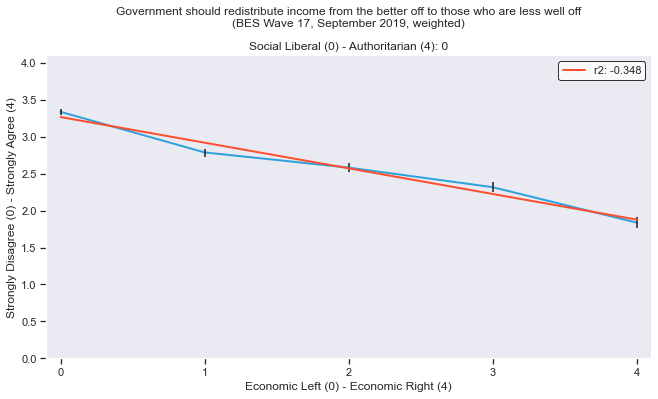
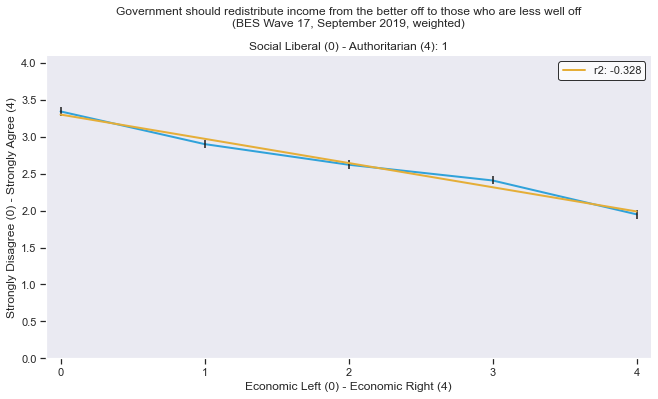
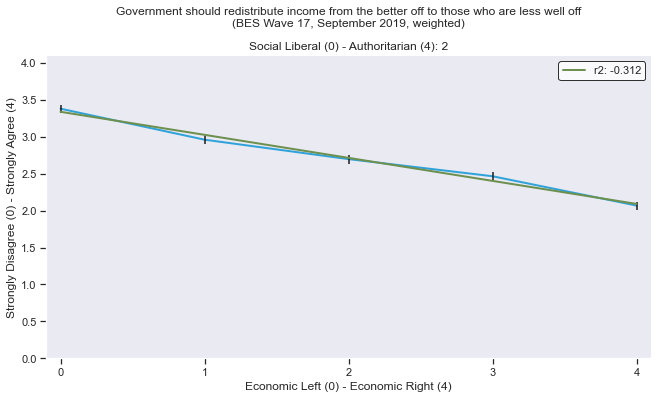
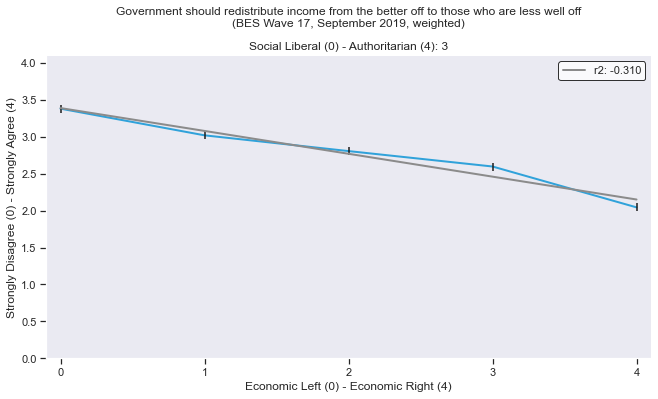
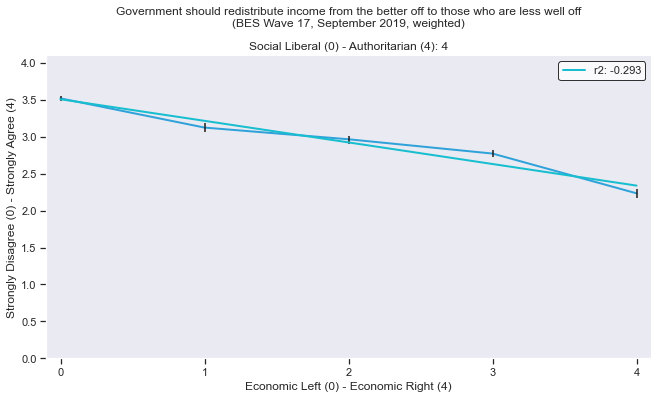

In [36]:
%%time
          
y_var_name = "lr5W17"
title = "\n".join(["Government should redistribute income from the better off to those who are less well off",
                   "(BES Wave 17, September 2019, weighted)"])
ylabel = "Strongly Disagree (0) - Strongly Agree (4)"

wt_var = "wt_new_W17"

# x_var_name = "p_gross_householdW17"
# xlabel = "Gross Household Income"

# x_cat_list = ["-£5k","£5-\n10k","£10-\n15k","£15-\n20k","£20-\n25k","£25-\n30k","£30-\n35k","£35-\n40k","£40-\n45k","£45-\n50k",
# "£50-\n60k","£60-\n70k","£70-\n100k","£100-\n150k","£150k+","Don't\nknow","Pref not\nto answer"]
# non_ord_indices = [15,16]

x_var_name = "lr"
xlabel =  "Economic Left (0) - Economic Right ("+str(granularity-1)+")"
non_ord_indices = []
x_cat_list = [0,1,2,3,4]

hv_dict,zlabel = hol_plot_var1_by_var2_by_al(x_var_name,xlabel,y_var_name,ylabel,wt_var,
                                   q=5,x_cat_list=x_cat_list,non_ord_indices=non_ord_indices,title=title)

hv.output(backend='matplotlib',fig='png', holomap='widgets')    
hm = hv.HoloMap(hv_dict, kdims=[zlabel])
hm

In [ ]:
###

In [9]:
search(BES_Panel,"lr_scale")

lr_scaleW1_W5      38503
lr_scaleW6         27819
lr_scaleW7_W9      36472
lr_scaleW10_W12    30352
lr_scaleW13        28065
lr_scaleW14W15     32385
lr_scaleW16        33450
lr_scaleW17        30488
dtype: int64

In [13]:
lr_scaleW17 = BES_Panel["lr_scaleW17"].cat.codes.replace(-1,np.nan)
al_scaleW17 = BES_Panel["al_scaleW17"].cat.codes.replace(-1,np.nan)

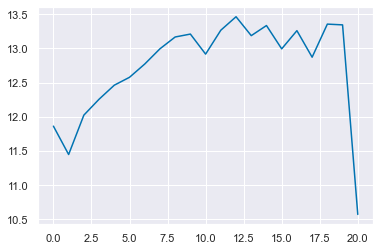

In [14]:
sns.lineplot(x=lr_scaleW17,y=al_scaleW17);

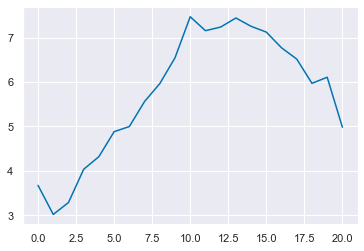

In [15]:
sns.lineplot(y=lr_scaleW17,x=al_scaleW17);

In [10]:
lr_col = pan_dataset_allr_values.columns[8]
al_col = pan_dataset_allr_values.columns[9]

BES_Panel["lr"] = pd.qcut(pan_dataset_allr_values[lr_col],21).cat.codes
BES_Panel["al"] = pd.qcut(pan_dataset_allr_values[al_col],21).cat.codes

In [35]:
# pan_dataset_allr_values.columns[8:10]
BES_Panel["lr"].describe()

count    97006.000000
mean         9.999990
std          6.055388
min          0.000000
25%          5.000000
50%         10.000000
75%         15.000000
max         20.000000
Name: lr, dtype: float64

In [13]:
def pair_with_weights(x,wt_var):
    return pd.Series(list(zip(x,BES_Panel[wt_var])),index=BES_Panel.index)

#,x.notnull()&BES_Panel["wt_new_W17"].notnull()

# pair_with_weights(BES_Panel["lr"])

Wall time: 26.1 s


Text(0, 0.5, 'Economic: Left (0) - Right (20)')

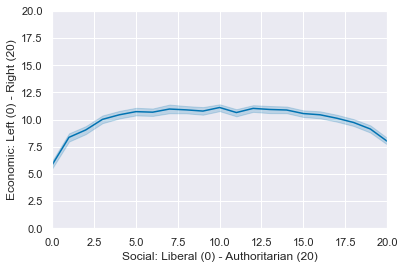

In [95]:
%%time
x_axis="al"
x_label = "Social: Liberal (0) - Authoritarian (20)"
y_axis="lr"
y_label = "Economic: Left (0) - Right (20)"
wt_var = "wt_new_W17"

mask = BES_Panel[x_axis].notnull()&BES_Panel[y_axis].notnull()&BES_Panel[wt_var].notnull()

sns.lineplot( x=BES_Panel[x_axis][mask] ,
              y=pair_with_weights(BES_Panel[y_axis],wt_var)[mask],
              estimator= weighted_mean );
plt.xlim([0,20]);
plt.ylim([0,20]);
plt.xlabel(x_label);
plt.ylabel(y_label);

In [96]:
BES_Panel["lr"] = pd.qcut(pan_dataset_allr_values[lr_col],101).cat.codes
BES_Panel["al"] = pd.qcut(pan_dataset_allr_values[al_col],101).cat.codes

Wall time: 18.2 s


Text(0, 0.5, 'Economic: Left (0) - Right (100)')

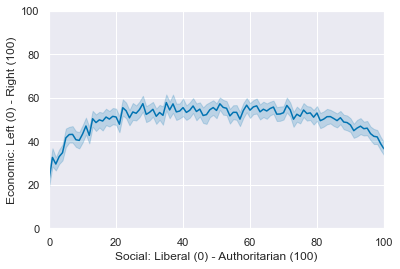

In [99]:
%%time
x_axis="al"
x_label = "Social: Liberal (0) - Authoritarian (100)"
y_axis="lr"
y_label = "Economic: Left (0) - Right (100)"
wt_var = "wt_new_W17"

mask = BES_Panel[x_axis].notnull()&BES_Panel[y_axis].notnull()&BES_Panel[wt_var].notnull()

sns.lineplot( x=BES_Panel[x_axis][mask] ,
              y=pair_with_weights(BES_Panel[y_axis],wt_var)[mask],
              estimator= weighted_mean );
plt.xlim([0,100]);
plt.ylim([0,100]);
plt.xlabel(x_label);
plt.ylabel(y_label);

In [103]:
# %%time
# x_axis="al"
# x_label = "Social: Liberal (0) - Authoritarian (100)"
# y_axis="lr"
# y_label = "Economic: Left (0) - Right (100)"
# wt_var = "wt_new_W17"

# mask = BES_Panel[x_axis].notnull()&BES_Panel[y_axis].notnull()&BES_Panel[wt_var].notnull()

# sns.regplot( x=BES_Panel[x_axis][mask] ,
#               y=BES_Panel[y_axis][mask],
#               lowess=True );
# plt.xlim([0,100]);
# plt.ylim([0,100]);
# plt.xlabel(x_label);
# plt.ylabel(y_label);

Wall time: 26.7 s


Text(0, 0.5, 'Social: Liberal (0) - Authoritarian (20)')

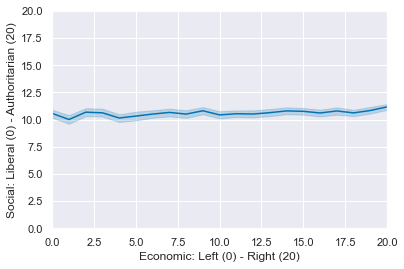

In [105]:
%%time
y_axis="al"
y_label = "Social: Liberal (0) - Authoritarian (20)"
x_axis="lr"
x_label = "Economic: Left (0) - Right (20)"
wt_var = "wt_new_W17"

mask = BES_Panel[x_axis].notnull()&BES_Panel[y_axis].notnull()&BES_Panel[wt_var].notnull()

sns.lineplot( x=BES_Panel[x_axis][mask] ,
              y=pair_with_weights(BES_Panel[y_axis],wt_var)[mask],
              estimator= weighted_mean );
plt.xlim([0,20]);
plt.ylim([0,20]);
plt.xlabel(x_label);
plt.ylabel(y_label);

In [98]:
#pair_with_weights(BES_Panel[y_axis])
#[mask.values]
# mask.values


# pd.Series(pair_with_weights(BES_Panel[y_axis],wt_var),index=BES_Panel.index)[mask]

# pair_with_weights(BES_Panel[y_axis],wt_var)[mask]
# %debug

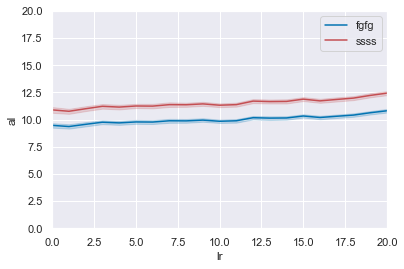

In [114]:
sns.lineplot(x=BES_Panel["lr"],y=BES_Panel["al"],label='fgfg');
sns.lineplot(x=BES_Panel["lr"],y=BES_Panel["al"]*1.15,c='r',label='ssss');
plt.legend();
plt.xlim([0,20]);
plt.ylim([0,20]);

Wall time: 2min 6s


Text(0, 0.5, 'Strongly Disagree (0) - Strongly Agree (4)')

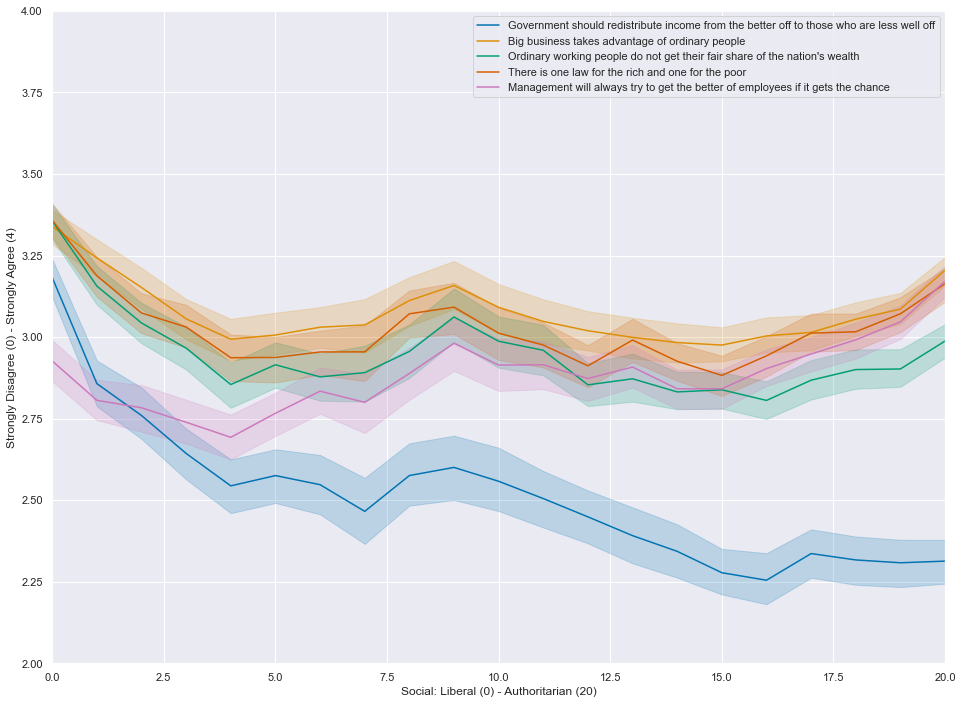

In [17]:
%%time

BES_Panel["lr1"] = BES_Panel["lr1W17"].cat.codes.replace(-1,np.nan)
BES_Panel["lr2"] = BES_Panel["lr2W17"].cat.codes.replace(-1,np.nan)
BES_Panel["lr3"] = BES_Panel["lr3W17"].cat.codes.replace(-1,np.nan)
BES_Panel["lr4"] = BES_Panel["lr4W17"].cat.codes.replace(-1,np.nan)
BES_Panel["lr5"] = BES_Panel["lr5W17"].cat.codes.replace(-1,np.nan)

x_axis="al"
x_label = "Social: Liberal (0) - Authoritarian (20)"

y_label = "Strongly Disagree (0) - Strongly Agree (4)"
wt_var = "wt_new_W17"

mask = BES_Panel[x_axis].notnull()&BES_Panel[y_axis].notnull()&BES_Panel[wt_var].notnull()

plt.figure(figsize=(16,12));

y_axis="lr1"
label = "Government should redistribute income from the better off to those who are less well off"
sns.lineplot( x=BES_Panel[x_axis][mask] ,
              y=pair_with_weights(BES_Panel[y_axis],wt_var)[mask],
              estimator= weighted_mean,label = label );
y_axis="lr2"
label = "Big business takes advantage of ordinary people"
sns.lineplot( x=BES_Panel[x_axis][mask] ,
              y=pair_with_weights(BES_Panel[y_axis],wt_var)[mask],
              estimator= weighted_mean,label = label );
y_axis="lr3"
label = "Ordinary working people do not get their fair share of the nation's wealth"
sns.lineplot( x=BES_Panel[x_axis][mask] ,
              y=pair_with_weights(BES_Panel[y_axis],wt_var)[mask],
              estimator= weighted_mean,label = label );
y_axis="lr4"
label = "There is one law for the rich and one for the poor"
sns.lineplot( x=BES_Panel[x_axis][mask] ,
              y=pair_with_weights(BES_Panel[y_axis],wt_var)[mask],
              estimator= weighted_mean,label = label );
y_axis="lr5"
label = "Management will always try to get the better of employees if it gets the chance"
sns.lineplot( x=BES_Panel[x_axis][mask] ,
              y=pair_with_weights(BES_Panel[y_axis],wt_var)[mask],
              estimator= weighted_mean,label = label );



plt.xlim([0,20]);
plt.ylim([2,4]);
plt.legend();
plt.xlabel(x_label);
plt.ylabel(y_label);

Wall time: 2min 13s


Text(0, 0.5, 'Strongly Disagree (0) - Strongly Agree (4)')

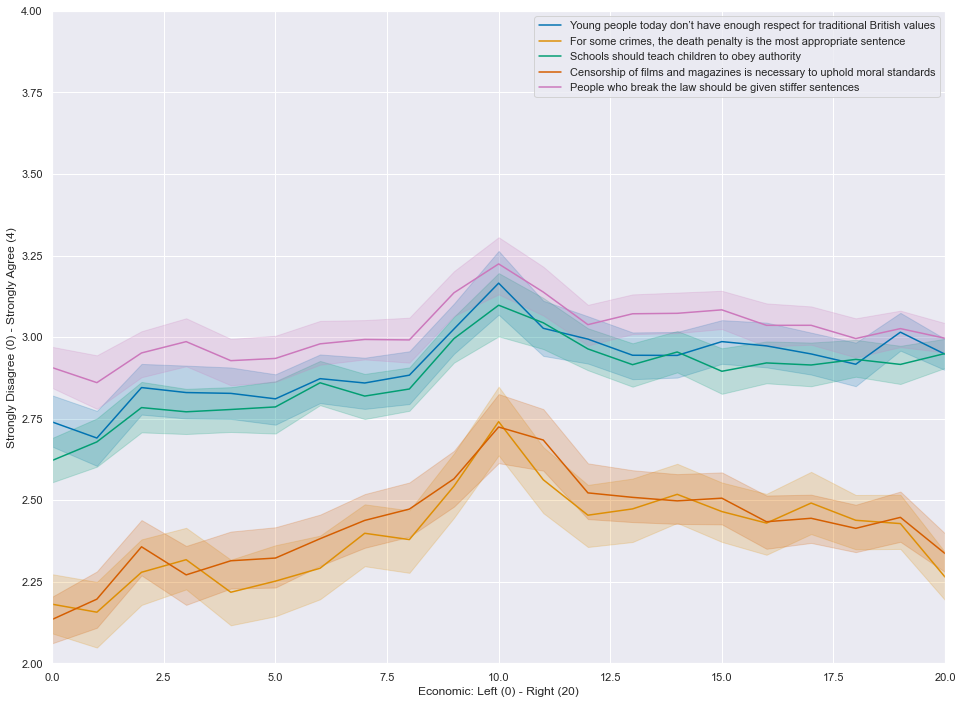

In [18]:
%%time

BES_Panel["al1"] = BES_Panel["al1W17"].cat.codes.replace(-1,np.nan)
BES_Panel["al2"] = BES_Panel["al2W17"].cat.codes.replace(-1,np.nan)
BES_Panel["al3"] = BES_Panel["al3W17"].cat.codes.replace(-1,np.nan)
BES_Panel["al4"] = BES_Panel["al4W17"].cat.codes.replace(-1,np.nan)
BES_Panel["al5"] = BES_Panel["al5W17"].cat.codes.replace(-1,np.nan)

x_axis="lr"
x_label = "Economic: Left (0) - Right (20)"

y_label = "Strongly Disagree (0) - Strongly Agree (4)"
wt_var = "wt_new_W17"



plt.figure(figsize=(16,12));

y_axis="al1"
mask = BES_Panel[x_axis].notnull()&BES_Panel[y_axis].notnull()&BES_Panel[wt_var].notnull()
label = "Young people today don’t have enough respect for traditional British values"
sns.lineplot( x=BES_Panel[x_axis][mask] ,
              y=pair_with_weights(BES_Panel[y_axis],wt_var)[mask],
              estimator= weighted_mean,label = label );
y_axis="al2"
mask = BES_Panel[x_axis].notnull()&BES_Panel[y_axis].notnull()&BES_Panel[wt_var].notnull()
label = "For some crimes, the death penalty is the most appropriate sentence"
sns.lineplot( x=BES_Panel[x_axis][mask] ,
              y=pair_with_weights(BES_Panel[y_axis],wt_var)[mask],
              estimator= weighted_mean,label = label );
y_axis="al3"
mask = BES_Panel[x_axis].notnull()&BES_Panel[y_axis].notnull()&BES_Panel[wt_var].notnull()
label = "Schools should teach children to obey authority"
sns.lineplot( x=BES_Panel[x_axis][mask] ,
              y=pair_with_weights(BES_Panel[y_axis],wt_var)[mask],
              estimator= weighted_mean,label = label );
y_axis="al4"
mask = BES_Panel[x_axis].notnull()&BES_Panel[y_axis].notnull()&BES_Panel[wt_var].notnull()
label = "Censorship of films and magazines is necessary to uphold moral standards"
sns.lineplot( x=BES_Panel[x_axis][mask] ,
              y=pair_with_weights(BES_Panel[y_axis],wt_var)[mask],
              estimator= weighted_mean,label = label );
y_axis="al5"
mask = BES_Panel[x_axis].notnull()&BES_Panel[y_axis].notnull()&BES_Panel[wt_var].notnull()
label = "People who break the law should be given stiffer sentences"
sns.lineplot( x=BES_Panel[x_axis][mask] ,
              y=pair_with_weights(BES_Panel[y_axis],wt_var)[mask],
              estimator= weighted_mean,label = label );



plt.xlim([0,20]);
plt.ylim([2,4]);
plt.legend();
plt.xlabel(x_label);
plt.ylabel(y_label);

Wall time: 28.5 s


Text(0, 0.5, 'Big business takes advantage of ordinary people\nStrongly Disagree (0) - Strongly Agree (4)')

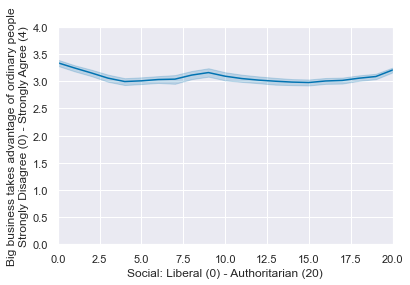

In [108]:
%%time



x_axis="al"
x_label = "Social: Liberal (0) - Authoritarian (20)"
y_axis="lr2"
BES_Panel[y_axis] = BES_Panel[y_axis+"W17"].cat.codes.replace(-1,np.nan)
y_label = "Big business takes advantage of ordinary people\nStrongly Disagree (0) - Strongly Agree (4)"
wt_var = "wt_new_W17"

mask = BES_Panel[x_axis].notnull()&BES_Panel[y_axis].notnull()&BES_Panel[wt_var].notnull()

sns.lineplot( x=BES_Panel[x_axis][mask] ,
              y=pair_with_weights(BES_Panel[y_axis],wt_var)[mask],
              estimator= weighted_mean );
plt.xlim([0,20]);
plt.ylim([0,4]);
plt.xlabel(x_label);
plt.ylabel(y_label);

Wall time: 28.6 s


Text(0.5, 1.0, "Ordinary working people do not get their fair share of the nation's wealth")

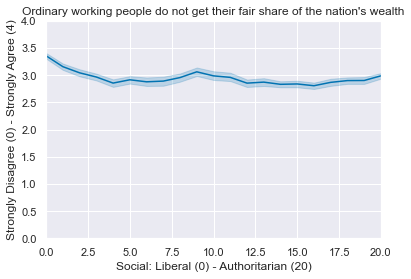

In [109]:
%%time



x_axis="al"
x_label = "Social: Liberal (0) - Authoritarian (20)"
y_axis="lr3"
BES_Panel[y_axis] = BES_Panel[y_axis+"W17"].cat.codes.replace(-1,np.nan)
title = "Ordinary working people do not get their fair share of the nation's wealth"
y_label = "Strongly Disagree (0) - Strongly Agree (4)"
wt_var = "wt_new_W17"

mask = BES_Panel[x_axis].notnull()&BES_Panel[y_axis].notnull()&BES_Panel[wt_var].notnull()

sns.lineplot( x=BES_Panel[x_axis][mask] ,
              y=pair_with_weights(BES_Panel[y_axis],wt_var)[mask],
              estimator= weighted_mean );
plt.xlim([0,20]);
plt.ylim([0,4]);
plt.xlabel(x_label);
plt.ylabel(y_label);
plt.title(title);

Wall time: 28.5 s


Text(0.5, 1.0, 'There is one law for the rich and one for the poor')

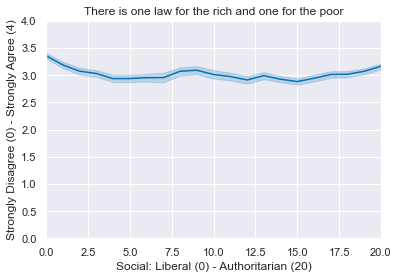

In [110]:
%%time



x_axis="al"
x_label = "Social: Liberal (0) - Authoritarian (20)"
y_axis="lr4"
BES_Panel[y_axis] = BES_Panel[y_axis+"W17"].cat.codes.replace(-1,np.nan)
title = "There is one law for the rich and one for the poor"
y_label = "Strongly Disagree (0) - Strongly Agree (4)"
wt_var = "wt_new_W17"

mask = BES_Panel[x_axis].notnull()&BES_Panel[y_axis].notnull()&BES_Panel[wt_var].notnull()

sns.lineplot( x=BES_Panel[x_axis][mask] ,
              y=pair_with_weights(BES_Panel[y_axis],wt_var)[mask],
              estimator= weighted_mean );
plt.xlim([0,20]);
plt.ylim([0,4]);
plt.xlabel(x_label);
plt.ylabel(y_label);
plt.title(title);

Wall time: 28.1 s


Text(0.5, 1.0, 'Management will always try to get the better of employees if it gets the chance')

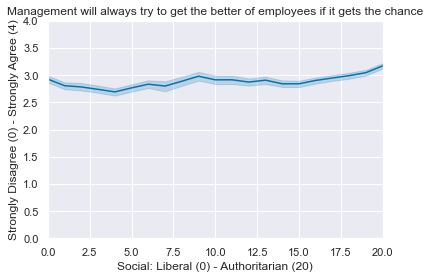

In [111]:
%%time



x_axis="al"
x_label = "Social: Liberal (0) - Authoritarian (20)"
y_axis="lr5"
BES_Panel[y_axis] = BES_Panel[y_axis+"W17"].cat.codes.replace(-1,np.nan)
title = "Management will always try to get the better of employees if it gets the chance"
y_label = "Strongly Disagree (0) - Strongly Agree (4)"
wt_var = "wt_new_W17"

mask = BES_Panel[x_axis].notnull()&BES_Panel[y_axis].notnull()&BES_Panel[wt_var].notnull()

sns.lineplot( x=BES_Panel[x_axis][mask] ,
              y=pair_with_weights(BES_Panel[y_axis],wt_var)[mask],
              estimator= weighted_mean );
plt.xlim([0,20]);
plt.ylim([0,4]);
plt.xlabel(x_label);
plt.ylabel(y_label);
plt.title(title);

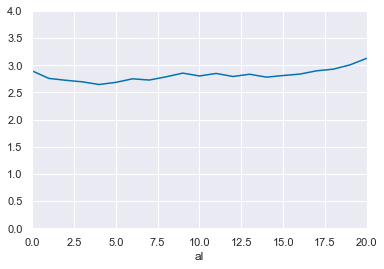

In [40]:
sns.lineplot(x=BES_Panel["al"],y=BES_Panel["lr5W17"].cat.codes.replace(-1,np.nan));
plt.xlim([0,20]);
plt.ylim([0,4]);

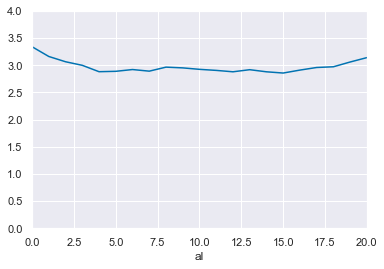

In [41]:
sns.lineplot(x=BES_Panel["al"],y=BES_Panel["lr4W17"].cat.codes.replace(-1,np.nan));
plt.xlim([0,20]);
plt.ylim([0,4]);

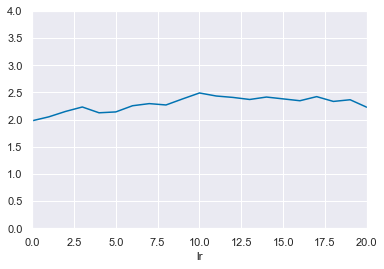

In [43]:
sns.lineplot(x=BES_Panel["lr"],y=BES_Panel["al2W17"].cat.codes.replace(-1,np.nan));
plt.xlim([0,20]);
plt.ylim([0,4]);

In [45]:
search(BES_Panel,"wt_new")

wt_new_W10           30237
wt_new_W11           30956
wt_new_W14           31063
wt_new_W15           30842
wt_new_W16           37959
wt_new_W1_W16         2427
wt_new_W18           37825
wt_new_W6W7          21081
wt_new_W2W6          23163
wt_new_W2W6W7        17076
wt_new_W9_W13        12562
wt_new_W12           34394
wt_new_W1_W11         6473
wt_new_W1_W12         5833
wt_new_W1_W13         5301
wt_new_W6_W11         9373
wt_new_W6_W12         8398
wt_new_W6_W13         7622
wt_new_W11_W13       21520
wt_new_W13W16        14647
wt_new_W13_result    31135
wt_new_W6W16          9587
wt_new_W2W16          8388
wt_new_W17           34366
wt_new_W13W17        15744
wt_new_W6W13W19       8743
wt_new_W9W19         13604
wt_new_W13_W19        5861
wt_new_W13W19        15811
wt_new_W16W19        21840
wt_new_W17W18W19     19000
wt_new_W19_result    32177
wt_new_W9            30036
wt_new_W8            33502
wt_new_W7            30895
wt_new_W6            30073
wt_new_W13W14        20393
w